In [2]:
library(ggplot2)
library(ggthemes)
library(Bolstad2)

Exercise 1

The number of particles emitted by a radioactive source during a fixed interval of time $(\Delta t = 10 s)$ follows a Poisson distribution on the parameter $\mu$. The number of particles observed during
consecutive time intervals is: 4, 1, 3, 1 and 3

(a) suppose a uniform prior distribution for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

In [2]:
#samples
y <- c(4, 1, 3,1, 3)
n <- 5
#Since we suppose a uniform prior distribution, then the posterior is given by Gamma(a, b)
#uniform prior 
p <- seq(0,10, 0.01)
a_prior <- 1
b_prior <- 0
prior <- dgamma(x = p, shape = a_prior, rate = b_prior)

a <- sum(y) + a_prior
b <- b_prior + n

posterior <- dgamma(p, a, b)

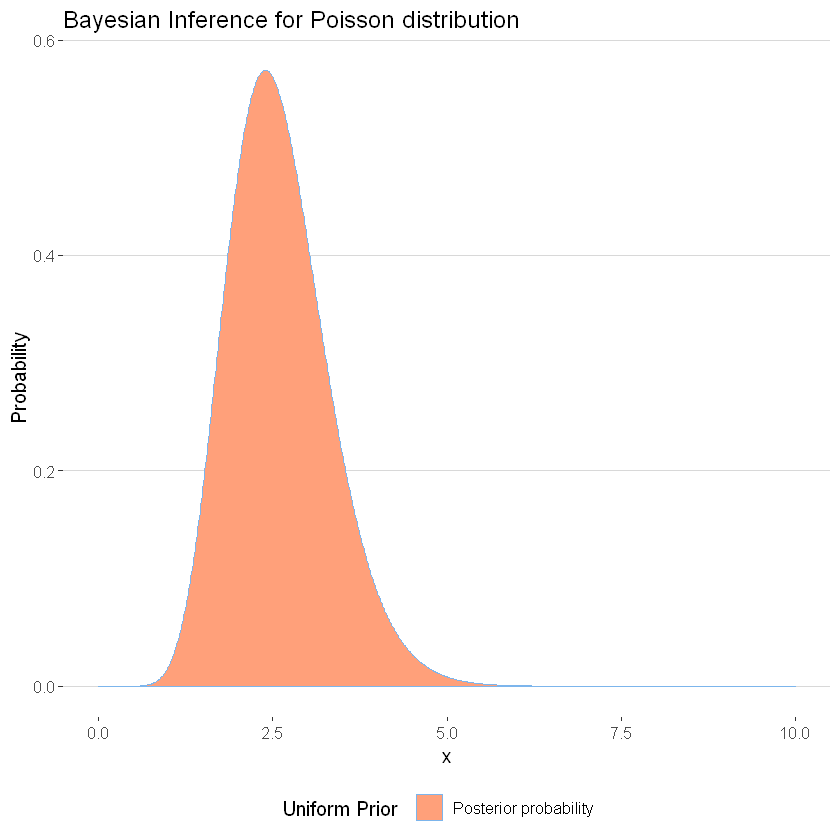

In [3]:
g <-ggplot(data.frame(p, posterior), aes(x=p, y = posterior, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightsalmon")  
g <- g +  labs( y="Probability", x = "x", col = 'Uniform Prior')  + xlim(c(0,10))
g <- g +ggtitle("Bayesian Inference for Poisson distribution")+ theme_hc()+ scale_colour_hc()
g <- g 
g

The mean is given by 

$
E(\mu|y) = \frac{r'}{v'}
$

and 

$
var(\mu|y) = \frac{r'}{v'^2}
$

In [4]:
mean_anali <- a/b

g <- function(x) x * dgamma(x, a, b)
g2 <- function(x) x*x * dgamma(x, a, b)

#The mean value is given by
mean <- integrate(g,
                lower = 0,
                upper = Inf)$value


In [5]:
cat(paste("The mean value analitical of the posterior is =  ", mean_anali), "\n")
cat(paste("The mean value computed of the posterior is =  ", mean))

The mean value analitical of the posterior is =   2.6 
The mean value computed of the posterior is =   2.60000000000019

In [6]:
var_anali <- a/(b**2)

#the variance is given by
V <- integrate(g2,
                lower = 0,
                upper = Inf)$value

var = V - mean**2

In [7]:
cat(paste("The variance analitical of the posterior is =  ", var_anali), "\n")
cat(paste("The variance computed of the posterior is =  ", var))

The variance analitical of the posterior is =   0.52 
The variance computed of the posterior is =   0.519999999999974

The median correspond to the value for which P(x ≤ med) = P(x > med) = 0.5

In [8]:
g <- function(x)  dgamma(x, a, b)

for (i in p){
    
    integral <- integrate(g,
                lower = 0,
                upper = i)$value
    if (integral >= 0.5){break}
}
median <- i 

In [9]:
cat(paste("The median value computed of the posterior is =  ", median))

The median value computed of the posterior is =   2.54

(b) suppose a Jefrey's prior for the parameter $\mu$
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

In [10]:
#jeffrey Gamma(1/2, 0)
a_prior <- 1/2
b_prior <- 0
jef_prior <- dgamma(x = p, shape = a_prior, rate = b_prior)

a <- sum(y) + a_prior
b <- b_prior + 5

jef_posterior <- dgamma(p, a, b)


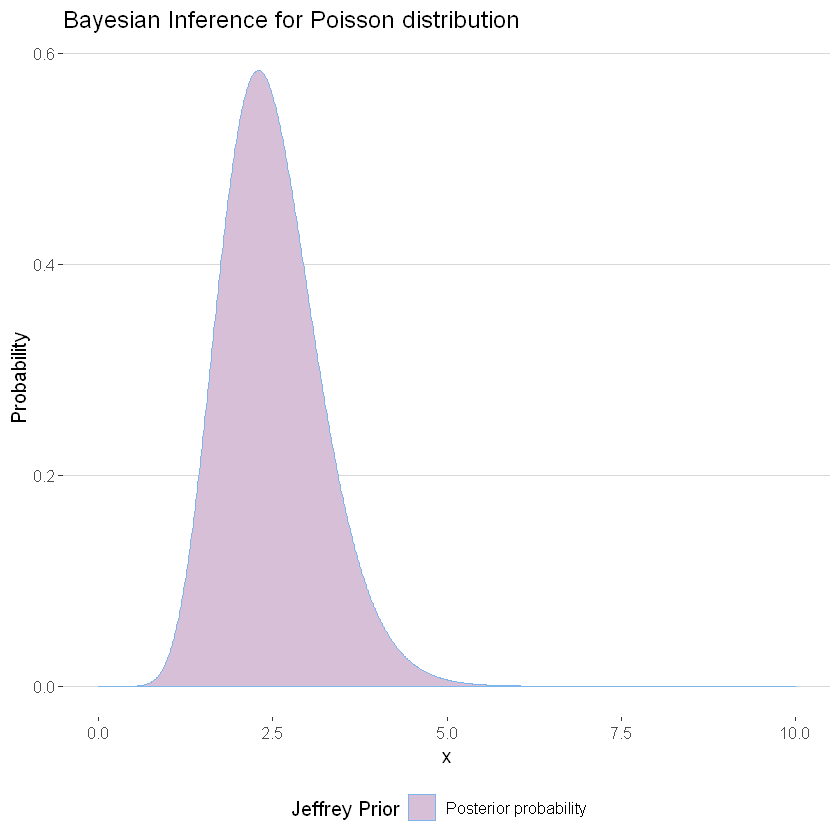

In [11]:
g <-ggplot(data.frame(p, jef_posterior), aes(x=p, y = jef_posterior, col = 'Posterior probability')) 
g <- g +  geom_area(fill="thistle")  
g <- g +  labs( y="Probability", x = "x", col = 'Jeffrey Prior')  + xlim(c(0,10))
g <- g +ggtitle("Bayesian Inference for Poisson distribution")+ theme_hc()+ scale_colour_hc()
g <- g 
g

In [12]:
mean_anali <- a/b

g <- function(x) x * dgamma(x, a, b)
g2 <- function(x) x*x * dgamma(x, a, b)

#The mean value is given by
mean_jef <- integrate(g,
                lower = 0,
                upper = Inf)$value


In [13]:
cat(paste("The mean value analitical of the posterior is =  ", mean_anali), "\n")
cat(paste("The mean value computed of the posterior is =  ", mean_jef))

The mean value analitical of the posterior is =   2.5 
The mean value computed of the posterior is =   2.50000000000012

In [14]:
var_anali <- a/(b**2)

#the variance is given by
V <- integrate(g2,
                lower = 0,
                upper = Inf)$value

var_jef = V - mean_jef**2

In [15]:
cat(paste("The variance analitical of the posterior is =  ", var_anali), "\n")
cat(paste("The variance computed of the posterior is =  ", var_jef))

The variance analitical of the posterior is =   0.5 
The variance computed of the posterior is =   0.500000000000102

In [16]:
g <- function(x)  dgamma(x, a, b)

for (i in p){
    
    integral <- integrate(g,
                lower = 0,
                upper = i)$value
    if (integral >= 0.5){break}
}
median <- i 

In [17]:
cat(paste("The median value computed of the posterior is =  ", median))

The median value computed of the posterior is =   2.44

(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same mean
and standard deviation

In [18]:
#Calculating the 95% interval
cdf_uniform <- sintegral(p, posterior)

d<-abs(cdf_uniform$y-0.025)
lb_unif<-cdf_uniform$x[max((1:length(cdf_uniform$y))[d==min(d)])]


d<-abs(cdf_uniform$y-0.975)
ub_unif<-cdf_uniform$x[min((1:length(cdf_uniform$y))[d==min(d)])]


In [19]:
#Calculating the 95% interval
cdf_jef <- sintegral(p, jef_posterior)

d<-abs(cdf_jef$y-0.025)
lb_jef<-cdf_jef$x[max((1:length(cdf_jef$y))[d==min(d)])]


d<-abs(cdf_jef$y-0.975)
ub_jef<-cdf_jef$x[min((1:length(cdf_jef$y))[d==min(d)])]


In [20]:
cat(paste("Approximate 95% credible interval for Unif : ["
          ,round(lb_unif,4)," ",round(ub_unif,4),"]\n",sep=""))

cat(paste("Approximate 95% credible interval for Jef : ["
          ,round(lb_jef,4)," ",round(ub_jef,4),"]\n",sep=""))

Approximate 95% credible interval for Unif : [1.3836 4.1908]
Approximate 95% credible interval for Jef : [1.3037 4.0609]


In [21]:
#confidence interval with normal  approximation
#A 95% interval correspond to 
z <- 1.96
z <- qnorm(0.975)

lb_unif_norm <- mean - z * sqrt(var)
ub_unif_norm <- mean + z * sqrt(var)

lb_jef_norm <- mean_jef - z * sqrt(var_jef)
ub_jef_norm <- mean_jef + z * sqrt(var_jef)

In [22]:
cat(paste("Approximate normal 95% credible interval for Unif : ["
          ,round(lb_unif_norm,4)," ",round(ub_unif_norm,4),"]\n",sep=""))

cat(paste("Approximate normal 95% credible interval for Jef : ["
          ,round(lb_jef_norm,4)," ",round(ub_jef_norm,4),"]\n",sep=""))


Approximate normal 95% credible interval for Unif : [1.1866 4.0134]
Approximate normal 95% credible interval for Jef : [1.1141 3.8859]


In [23]:
norm <- dnorm(p, mean, sd = sqrt(var))
df <-data.frame(p, posterior, norm)

Warning message:
"Removed 300 rows containing missing values (position_stack)."Warning message:
"Removed 300 rows containing missing values (geom_path)."

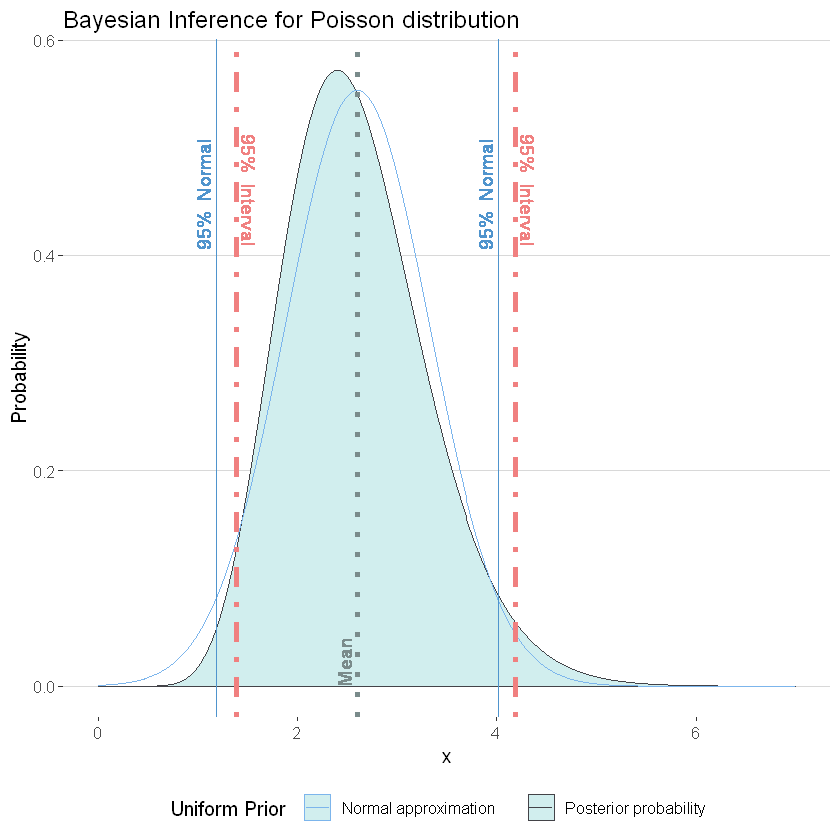

In [24]:
g <-ggplot(df, aes(x=p, y = posterior, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightcyan2")  

g <- g  +   geom_line(aes(x=p, y =norm, col = 'Normal approximation'))
g <- g +  labs( y="Probability", x = "x", col = 'Uniform Prior')  + xlim(c(0,7))
g <- g + ggtitle("Bayesian Inference for Poisson distribution")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = mean, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=mean, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)

g <- g +  geom_vline(xintercept = lb_unif, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=lb_unif, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)

g <- g +  geom_vline(xintercept = lb_unif_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb_unif_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)


g <- g +  geom_vline(xintercept = ub_unif, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=ub_unif, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)

g <- g +  geom_vline(xintercept = ub_unif_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub_unif_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)


g


Warning message:
"Removed 300 rows containing missing values (position_stack)."Warning message:
"Removed 300 rows containing missing values (geom_path)."

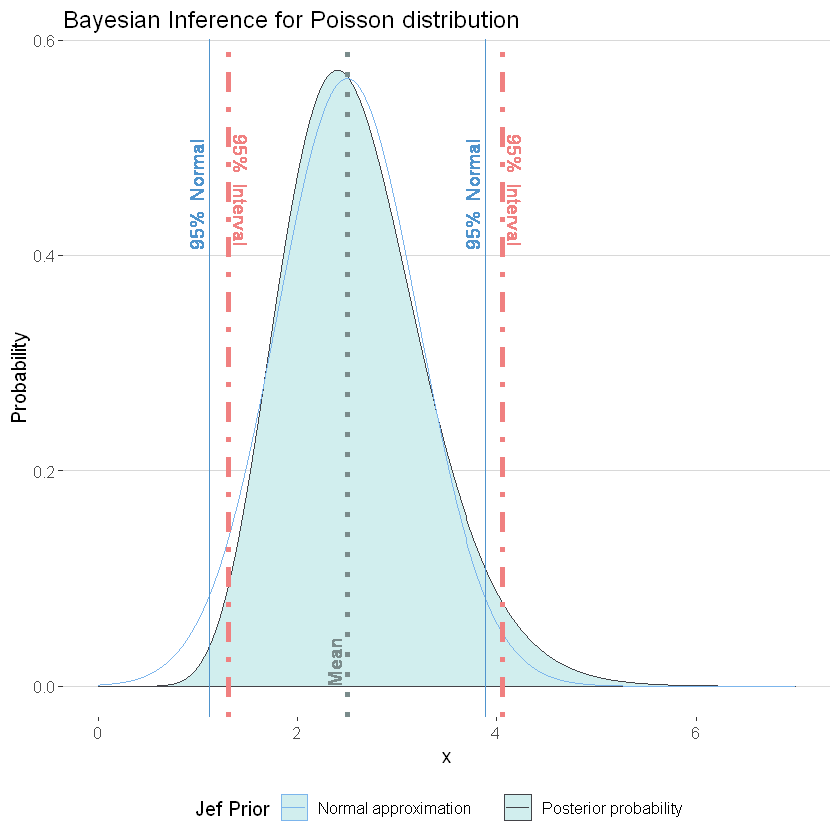

In [25]:
norm <- dnorm(p, mean_jef, sqrt(var_jef))
df <- data.frame(p, jef_posterior, norm)
g <-ggplot(df, aes(x=p, y = posterior, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightcyan2")  
g <- g  +   geom_line(aes(x=p, y =norm, col = 'Normal approximation'))
g <- g +  labs( y="Probability", x = "x", col = 'Jef Prior')  + xlim(c(0,7))
g <- g + ggtitle("Bayesian Inference for Poisson distribution")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = mean_jef, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=mean_jef, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)

g <- g +  geom_vline(xintercept = lb_jef, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=lb_jef, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)



g <- g +  geom_vline(xintercept = lb_jef_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb_jef_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)


g <- g +  geom_vline(xintercept = ub_jef, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=ub_jef, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)

g <- g +  geom_vline(xintercept = ub_jef_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub_jef_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)


g


## Exercise 2

Given the problem of the lighthouse discussed last week, study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

A lighthouse is located at a position $alpha$ along the shore and at a discance $beta$ out at sea. It emits a series of short highly collimated flases at random intervals and at random angles. 

We detect the pulses on the coast using the photo-detectors; they record only the position $X_k$ of the flahs arrival on the coast, but not the angle of emission. 

N flashes have been recorded at positions {$X_k$}. We want to estimate the position of the lighthouse. 

It looks reasonable to assign a uniform Likelihood pdf on the azimuth angle $\theta_k$

$P(\theta_k|\alpha, \beta)  = 1 / \pi$

where $\theta_k$ is connected to $\alpha$ and $\beta$ via

$x_k - \alpha = \beta tan (\theta_k)$
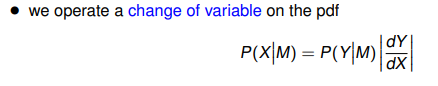

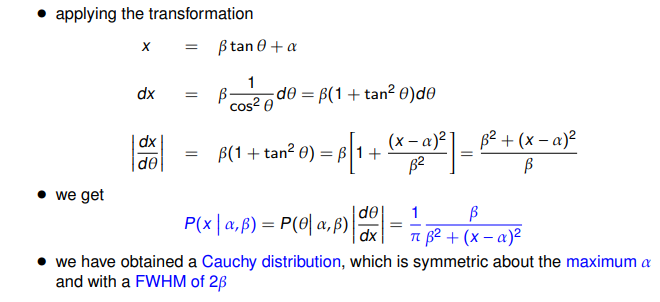

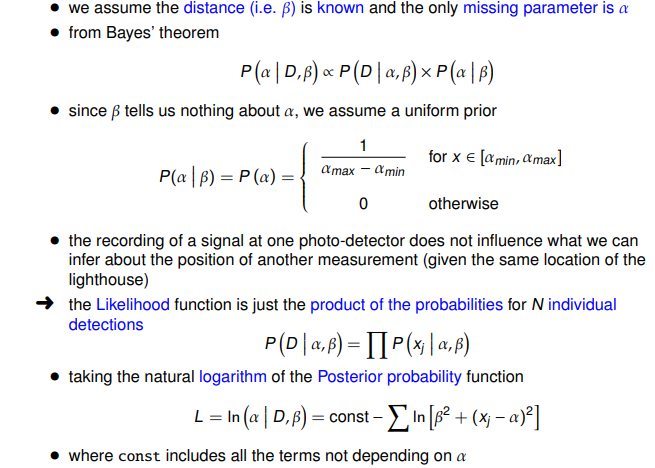

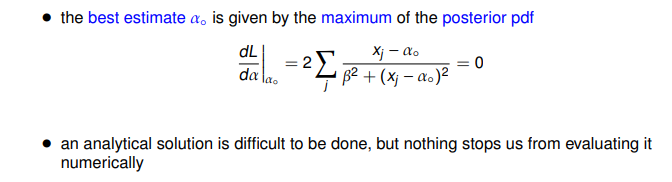

In [4]:
#true lighthouse parameter
alpha.true <- 1 
beta.true <- 1

#let's create the dataset.
set.seed(123)
N  <- 1000
theta_k <- runif(N,-pi/2,pi/2)

data <- beta.true * tan(theta_k) + alpha.true 

Since we have two unkown parameters, we are going to asssume that $\alpha$ is perpendicular to $\beta$ (and we are also going to assume that is unifomr in an interval $[0, y_{max}]$

In [5]:
#instead of calculating the posterior, it is better to evaluate the logarigm of the posterior. and afterwards take the exponential
p.log.like <- function(a, b,  data) {
    logL <- 0.0
    for (x in data) {
#        logL <- logL - log(1 + ((x-a)/b)**2) + log(b)
         logL <- logL - log(b**2 + (x -a)**2) + log(b/pi)
 
    }
    return(logL)
    }

In [6]:
n.sample <- 500
x.min <- -2; x.max <- +2
y_max <- 2
y_min <- 0

h_A <- (x.max - x.min)/n.sample
alpha <- seq(from=x.min, by=h_A, length.out=n.sample+1)

h_B <- (y_max - y_min)/n.sample
beta <-seq(from=y_min, by=h_B, length.out=n.sample+1)

Alpha max:  0.216 
beta max:  0.004 
Alpha max:  1.368 
beta max:  1.024 


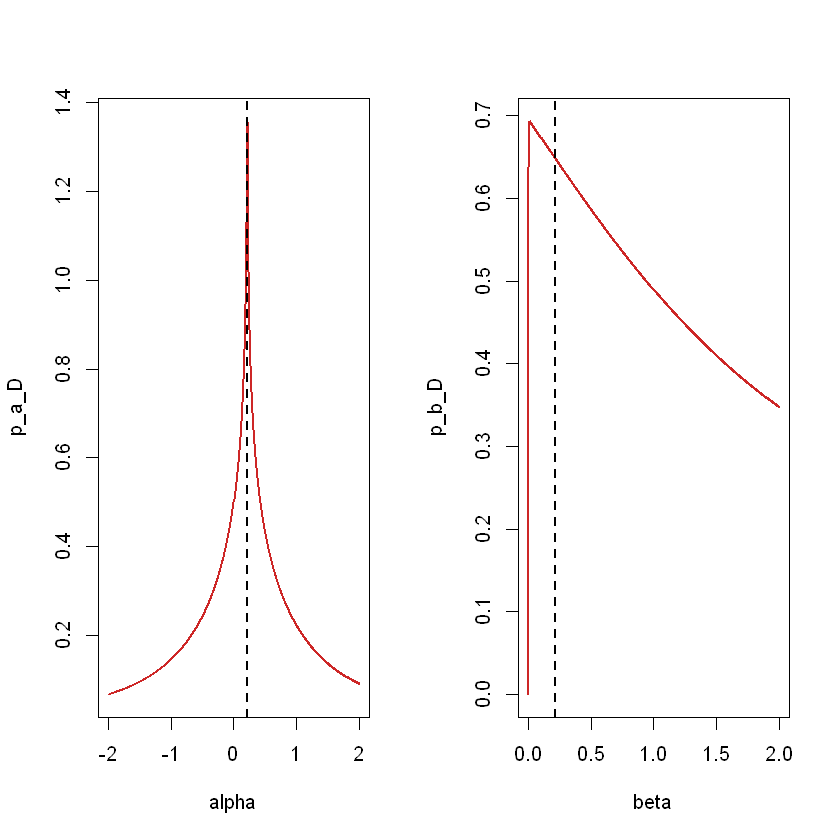

Alpha max:  0.584 
beta max:  0.396 


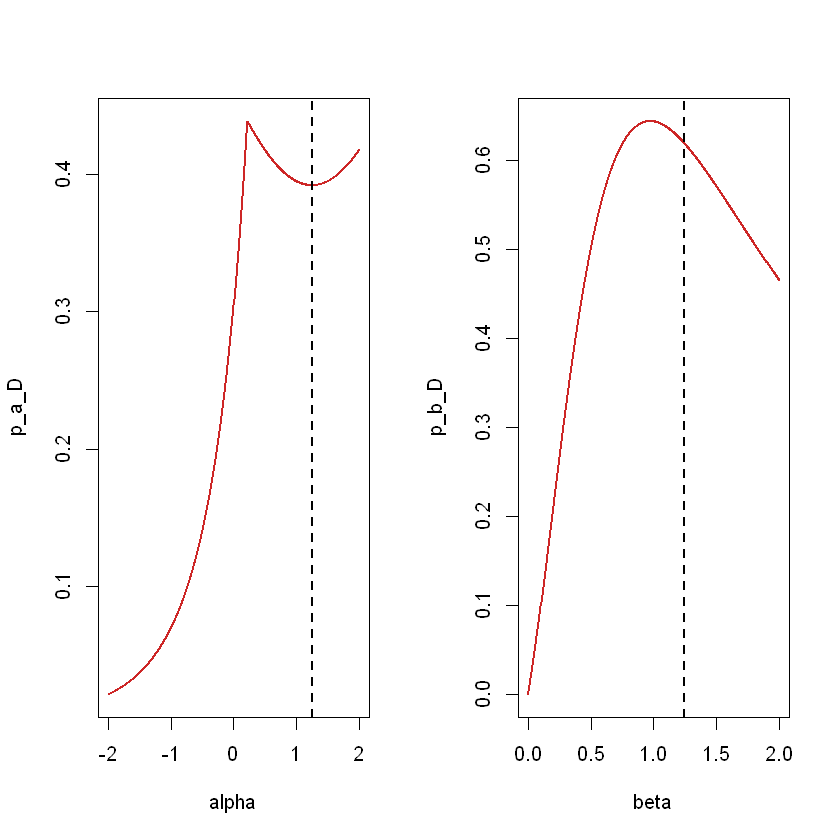

Alpha max:  1.136 
beta max:  1.028 


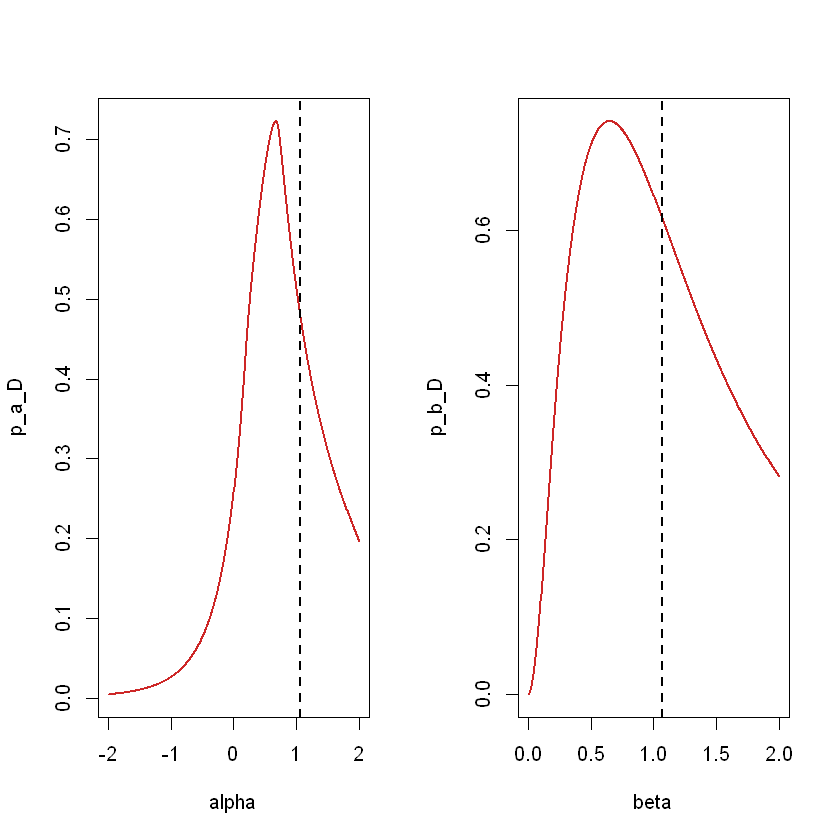

Alpha max:  2 
beta max:  1.472 


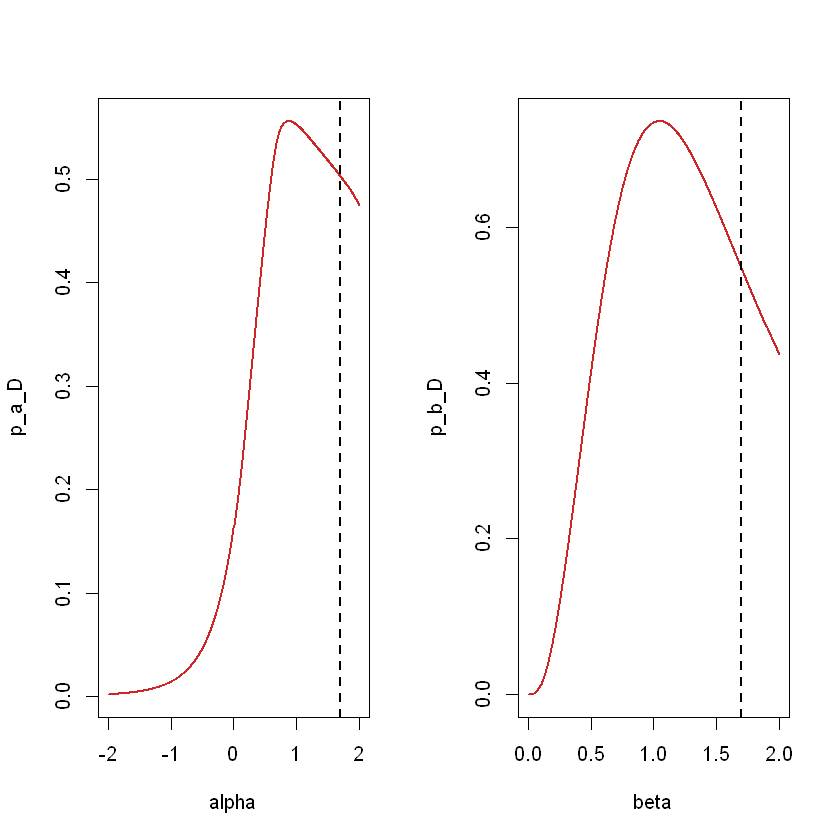

Alpha max:  1.152 
beta max:  0.976 


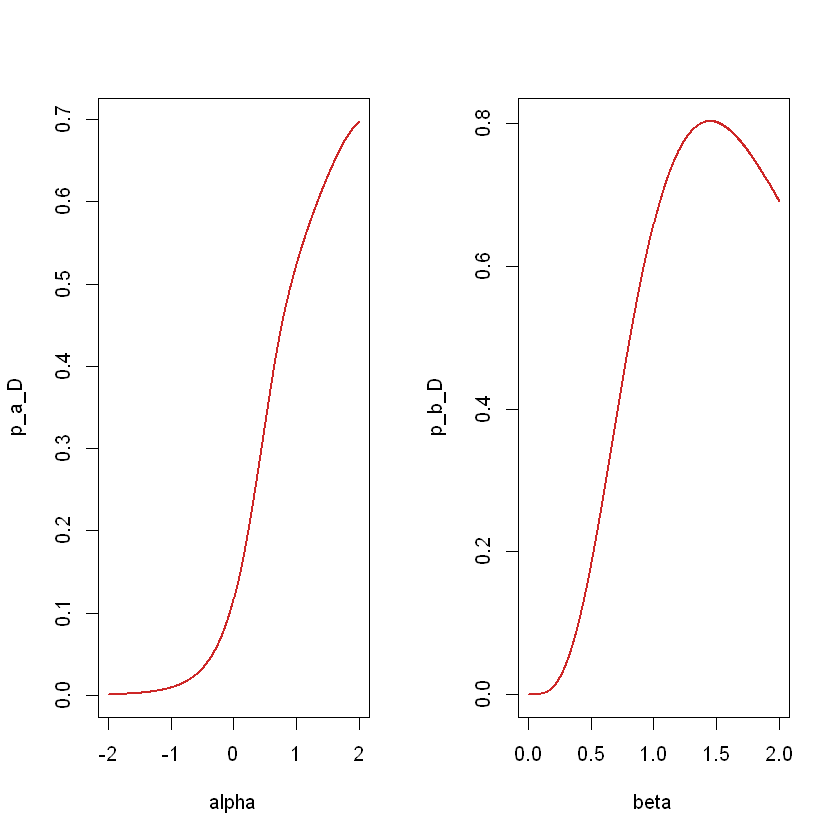

Alpha max:  1.136 
beta max:  0.86 


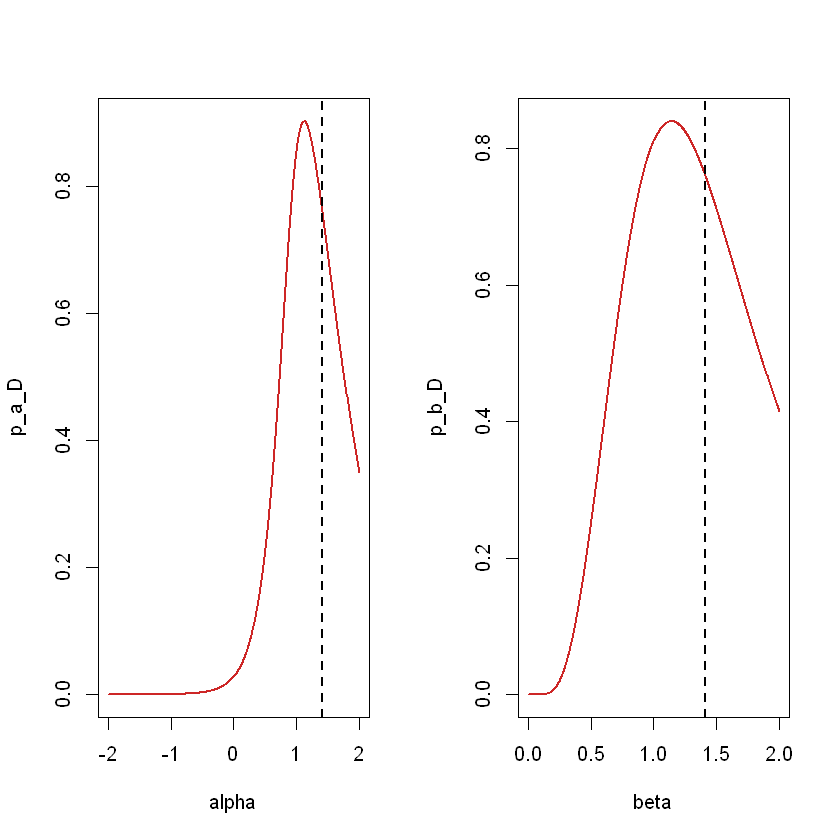

Alpha max:  1.096 
beta max:  1.244 


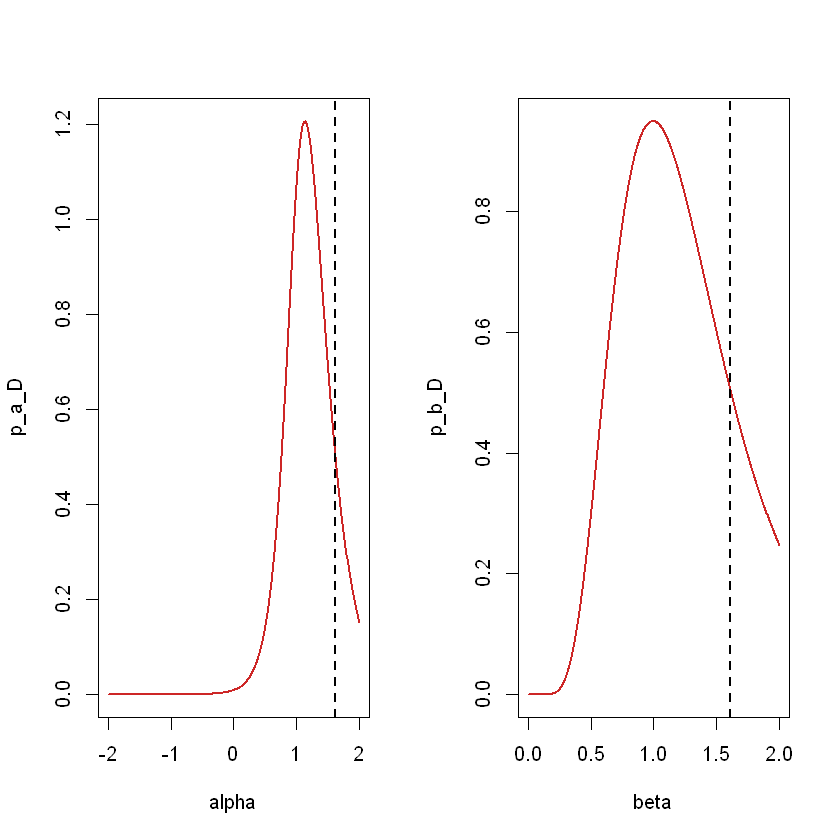

Alpha max:  1.296 
beta max:  1.184 


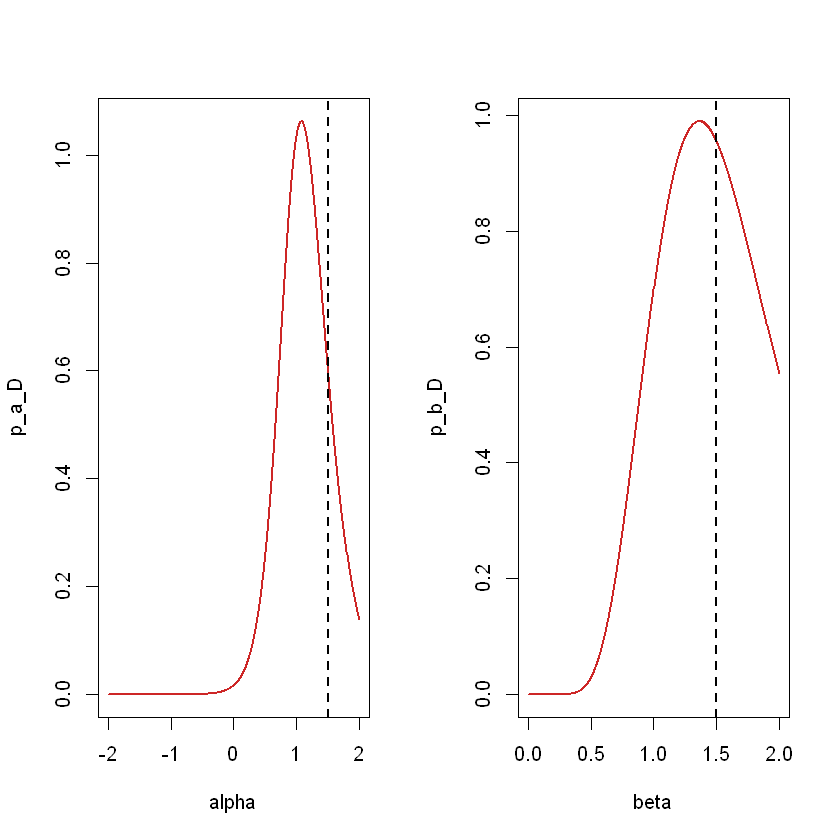

Alpha max:  1.208 
beta max:  0.972 


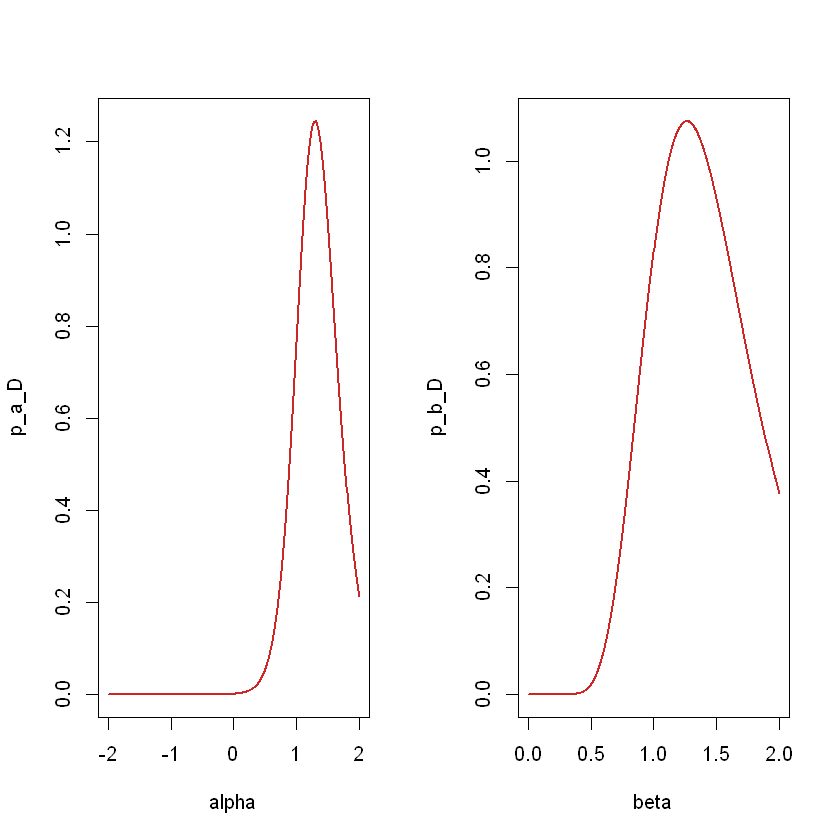

Alpha max:  0.952 
beta max:  1.028 


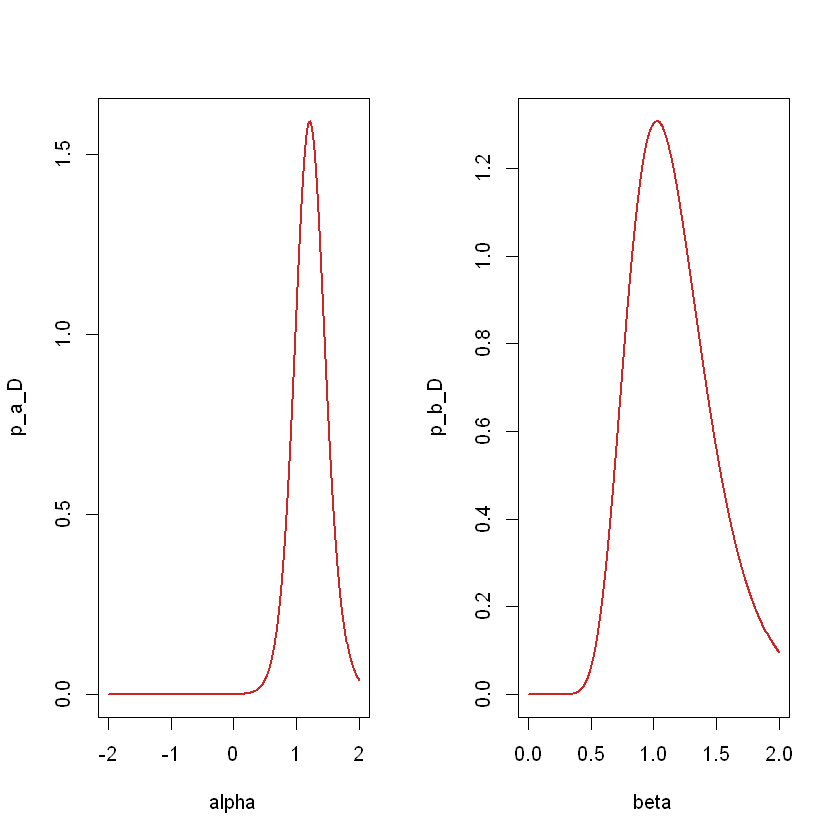

Alpha max:  0.96 
beta max:  0.972 


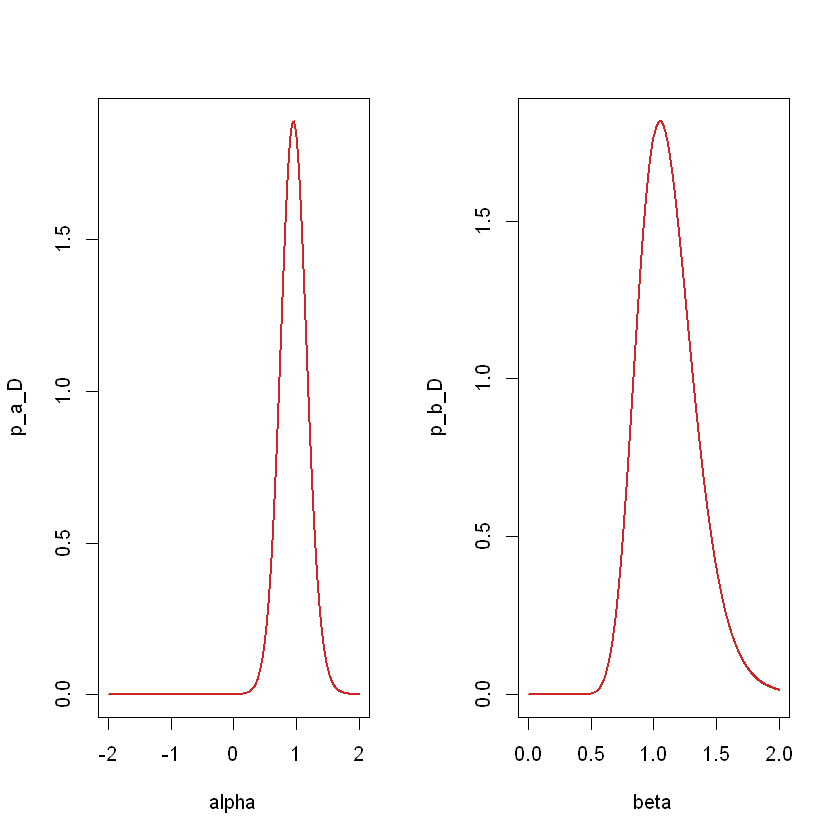

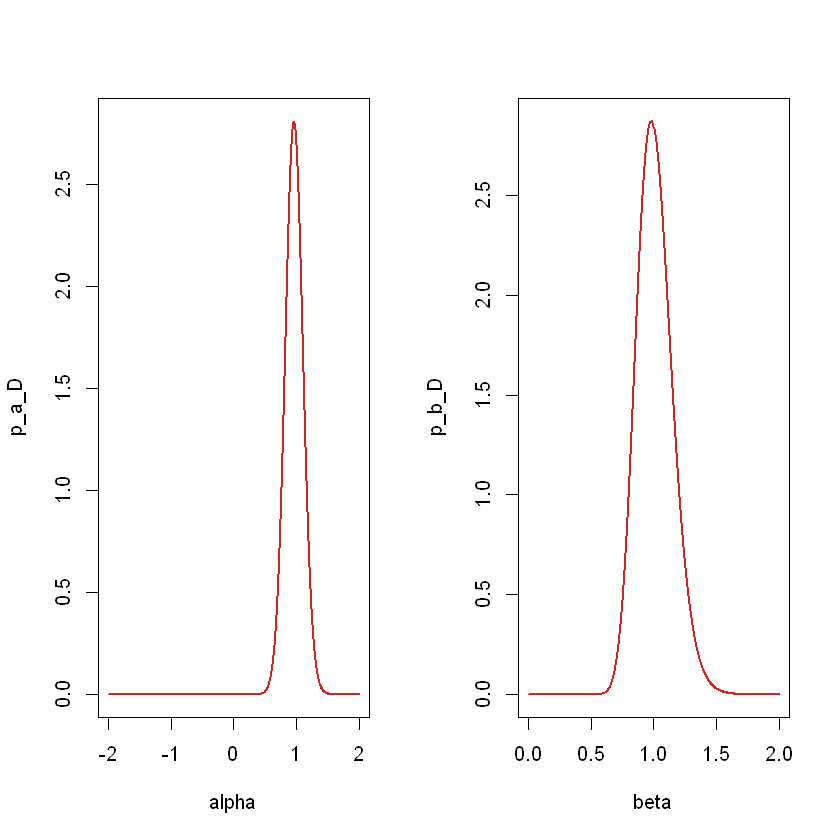

In [18]:
n. <- c(1, 2,3, 4,  5, 10, 15, 20, 25,  30 ,50, 100)
alphas <- c()
betas <- c()
for (n.plot in n.){
    dt <- data[1:n.plot]
   
    # Get the LogLikelihood max value of alpha and beta
    z <- matrix(data=NA, nrow = length(alpha), ncol = length(beta))
    for (j in 1:length(alpha)){
        for (k in 1:length(beta)){
            z[j, k] <- p.log.like(alpha[j], beta[k], dt)
        }
    }
        
    alpha.max.index <- which(z == max(z), arr.ind = TRUE)[1]
    beta.max.index <- which(z == max(z), arr.ind = TRUE)[2]
    
    alpha.max <- alpha[alpha.max.index]
    beta.max <- beta[beta.max.index]
    
    cat(paste("Alpha max: ", alpha.max, "\n"))
    alphas <- append(alphas, alpha.max)

    cat(paste("beta max: ", beta.max, "\n"))
    betas <- append(betas, beta.max)

    # normalize marginilieze posterior
    p_a_D <- apply (exp(z), 1, sum)
    p_a_D <- p_a_D/(h_A*sum(p_a_D))
    
    p_b_D <- apply (exp(z), 2, sum)
    p_b_D <- p_b_D/(h_B*sum(p_b_D))
    
    par(mfrow = c(1, 2))
    plot(alpha , p_a_D , type="l", lwd=2, col="firebrick3")
    dt.mean <- mean(dt)
    abline(v=dt.mean , lty=2, lwd=2)
    y.band <- (max(p_a_D) - min(p_a_D ))*0.05
    plot(beta , p_b_D , type="l", lwd=2, col="firebrick3")
    dt.mean <- mean(dt)
    abline(v=dt.mean , lty=2, lwd=2)
    y.band <- (max(p_b_D) - min(p_b_D ))*0.05

}


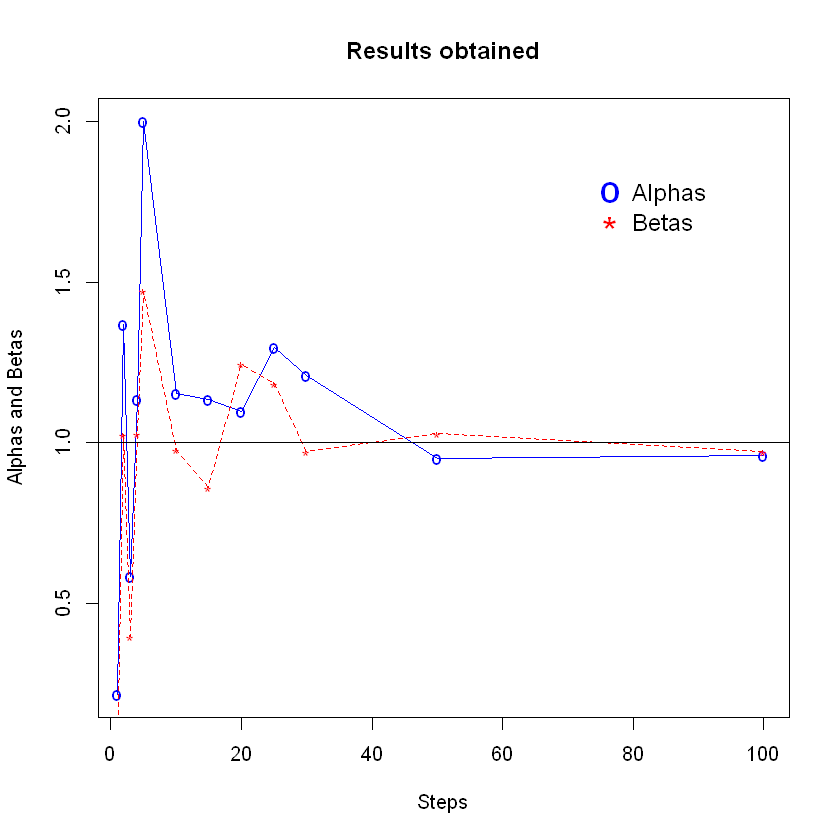

In [16]:
plot(n., alphas, type="o", col="blue", pch="o", lty=1, xlim = c(2,100), ylab="Alphas and Betas", xlab = "Steps")
points(n., betas, col="red", pch="*")
lines(n., betas, col="red",lty=2)
title('Results obtained for max values')
abline(h = 1)

legend("topright", 
  legend = c("Alphas", "Betas"), 
  col = c("blue","red"), 
  pch = c("o","*"), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))

## Exercise 3

Given the Signal over Background example discussed last week, analyze and discuss the following
cases:

(a) vary the sampling resolution of used to generate the data, keeping the same sampling range

        xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
- change the resolution w = {0.1, 0.25, 1, 2, 3}
- Check the effect on the results



In [31]:
#true signal - we assume only not known parameter a and b
signal <- function(x, a, b, x0, w, t) {
        t*(a*exp(-(x-x0)^2/(2*w^2)) + b)
}

In [32]:
#Prior on a and b: P(a,b) = const if a>0 and b>0, = 0 otherwise.
logupost <- function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf)} # the effect of the prior
    #Likelihood for one point is Poisson with mean d(x),
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

In [33]:
#parameters
x0 <- 0 # centre of peak
w <- 1 # sd of peak
atrue <- 2 # amplitude
btrue <- 1 # background
t <- 5 # scale factor (exposure time -> sets SNR)

In [34]:
# Sampling grid 
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 1e2
uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid
b <- blim[1] + diff(blim)*uniGrid

[1] 0.1
[1] 0.25


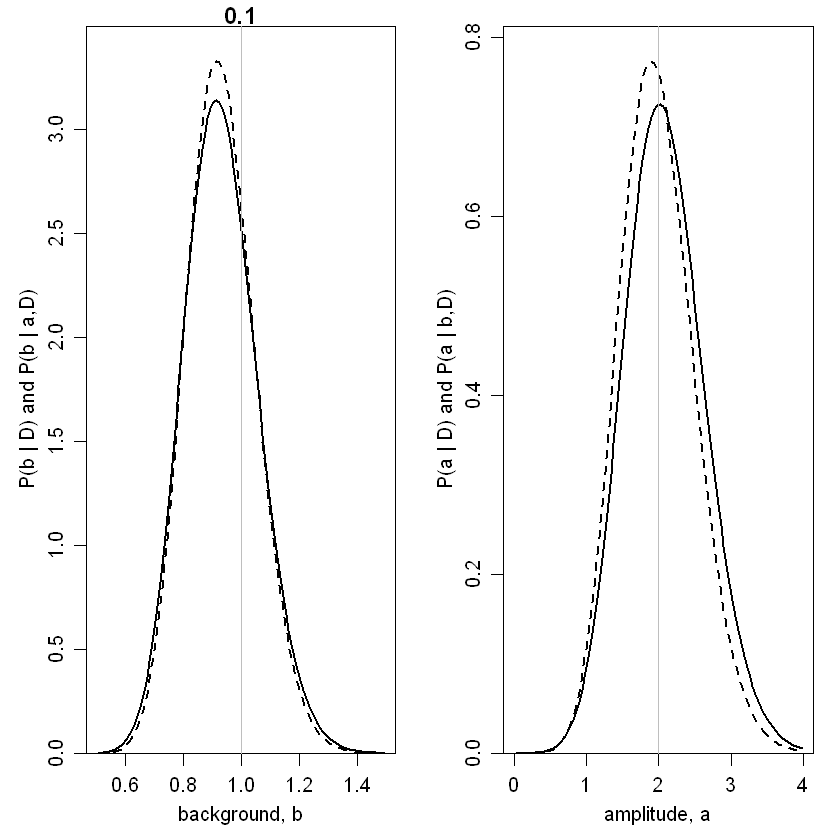

[1] 1


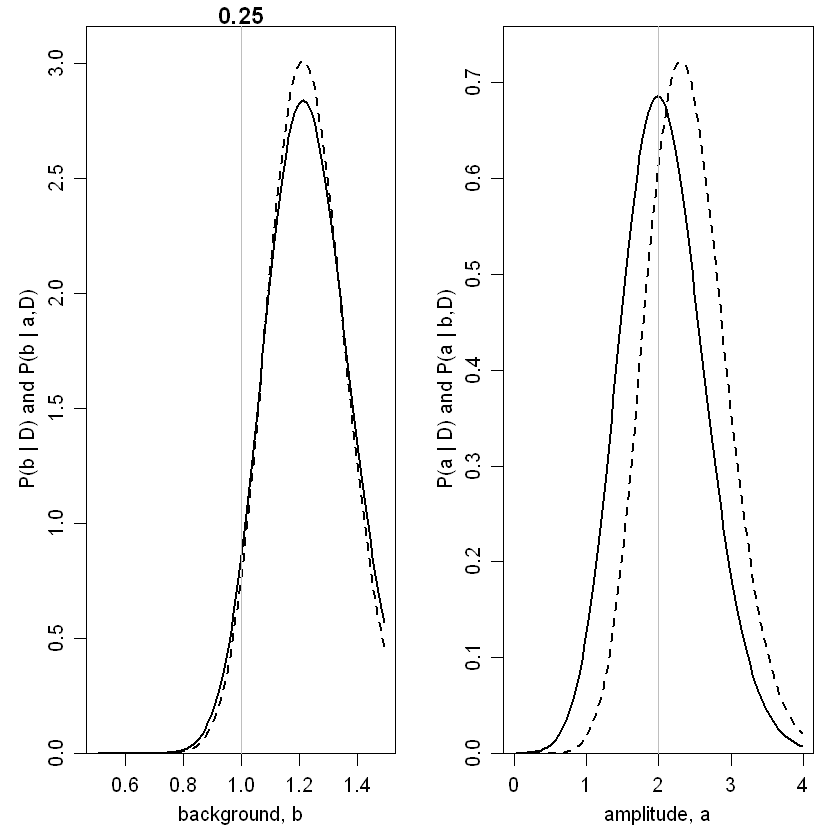

[1] 2


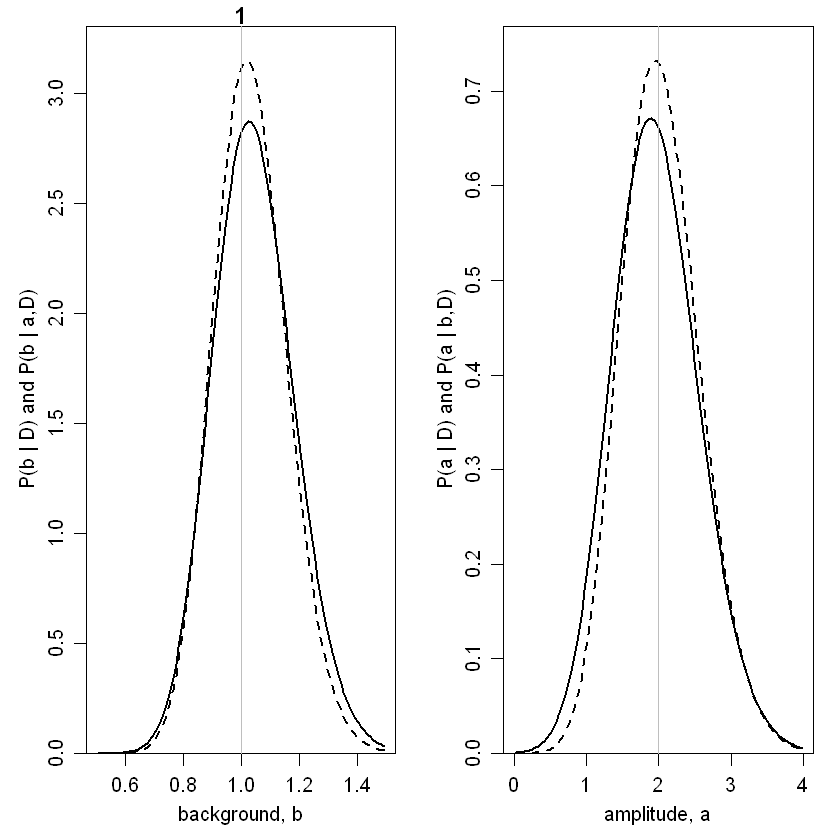

[1] 3


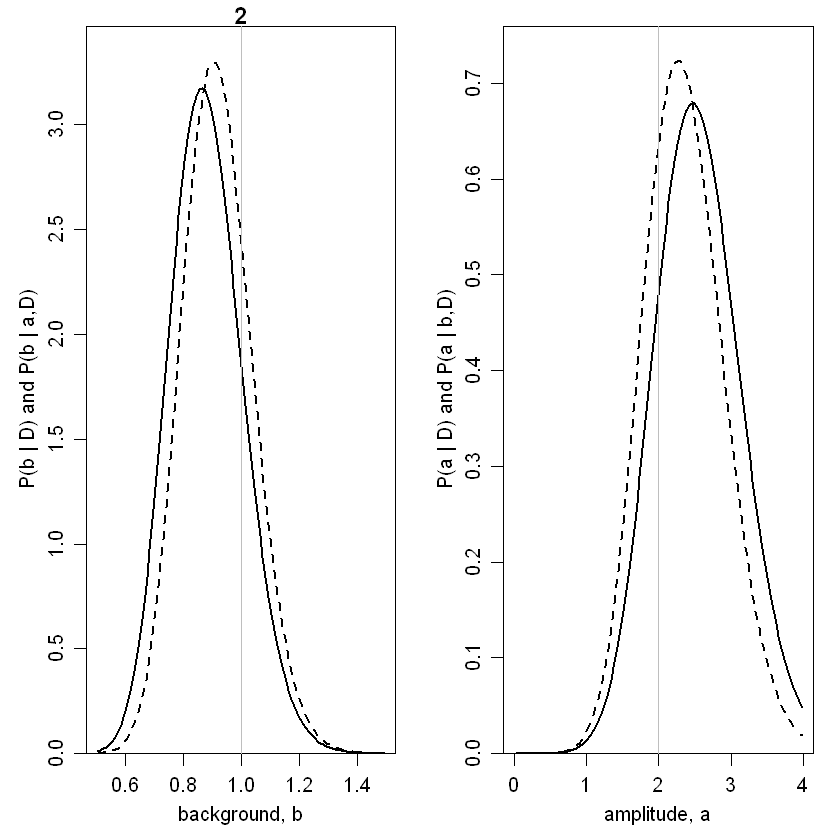

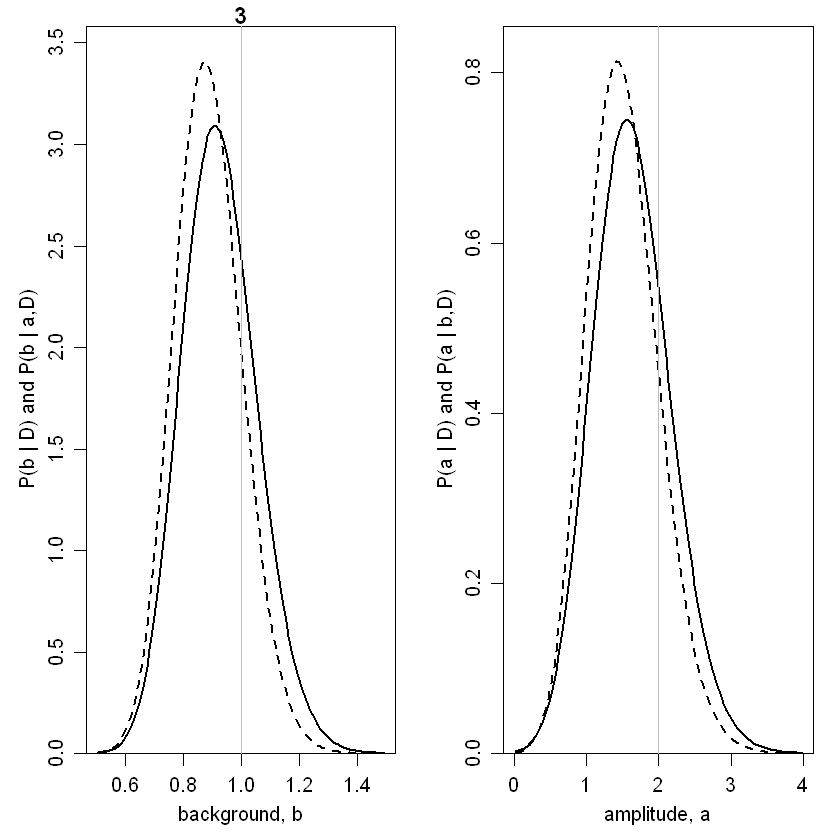

In [35]:
ww <- c(0.1, 0.25, 1, 2, 3)
mean.a <-c()
mean.b <- c()
sd.a<- c()
sd.b <- c()
ro <- c()
set.seed(205)
p.a.D <- data.frame()
p.b.D<- data.frame()
p.a.bD<- data.frame()
p.b.bD<- data.frame()
 par(mfrow=c(1,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
for (w in ww){
    print(w)
    
    xdat <- seq(from=-7*w, to=7*w, by=w)
    strue <- signal(xdat, atrue, btrue, x0, w, t)
    ddat <- rpois(length(strue), strue)
    
    #log unnormalized posterior
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- logupost(ddat, xdat, a[j], b[k], x0, w, t)
                            }
                            }
    z <- z - max(z) # set maximum to zero
   
    # Compute normalized marginalized posteriors, P(a|D) and P(b|D)
    # by summing over other parameter
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    # Compute mean, standard deviation, covariance, correlation, of a and b
    mean_a <- delta_a * sum(a * p_a_D)
    mean_b <- delta_b * sum(b * p_b_D)
    sd_a <- sqrt( delta_a * sum((a-mean_a)^2 * p_a_D) )
    sd_b <- sqrt( delta_b * sum((b-mean_b)^2 * p_b_D) )
    
    # To calculate the covariance I need to normalize P(a,b|D) = exp(z).
    cov_ab <- 0
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
                cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])
                            }
                    }
    cov_ab <- cov_ab / sum(exp(z))
    rho_ab <- cov_ab / (sd_a * sd_b)
    
    mean.a <- append(mean.a, mean_a)
    sd.a <- append(sd.a, sd_a)
    
    mean.b <- append(mean.b, mean_b)
    sd.b <- append(sd.b, sd_b)
    
    ro <- append(ro, rho_ab)
  #  cat(" a = ", mean_a, "+/-", sd_a, "\n")
  #  cat(" b = ", mean_b, "+/-", sd_b, "\n")
  #  cat("rho = ", rho_ab, "\n")
    
    # Compute normalized conditional posteriors, P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters. Vectorize(func, par)
    # makes a vectorized function out of func in the parameter par.
    p_a_bD <- exp(Vectorize(logupost, "a")(ddat, xdat, a, btrue, x0, w, t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(logupost, "b")(ddat, xdat, atrue, b, x0, w, t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    p.a.D <- rbind(p.a.D, p_a_D)
    p.b.D <- rbind(p.b.D, p_b_D)
    p.a.bD <- rbind(p.a.bD, p_a_bD)
    p.b.bD <- rbind(p.b.bD, p_b_aD)

    
    # Make plots
    # Plot true model and data
   
    
   # xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
   # splot <- signal(xplot, atrue, btrue, x0, w, t)
   # plot(xplot, splot, ylim=range(c(splot, ddat)), xlab="x", ylab="s or d",
   # type="l", col="grey", lwd=2)
   # points(xdat, ddat)
    # Plot unnormalized 2D posterior as contours.
    # Note that they are labelled by posterior density relative to peak,
    # NOT by how much probabilty they enclose.
    #contour(a, b, exp(z), nlevels=5, labcex=0.5, lwd=2, xlab="amplitude, a",
    #ylab="background, b")
    #abline(v=2,h=1,col="grey")
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background, b", yaxs="i", main = w, 
    ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(b | D) and P(b | a,D)",
    type="l", lwd=2)
    lines(b, p_b_aD, lwd=2, lty=2)
    abline(v=btrue, col="grey")
    plot(a, p_a_D, xlab="amplitude, a", yaxs="i",
    ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(a | D) and P(a | b,D)",
    type="l", lwd=2)
    lines(a, p_a_bD, lwd=2, lty=2)
    abline(v=atrue, col="grey")
   
 
}

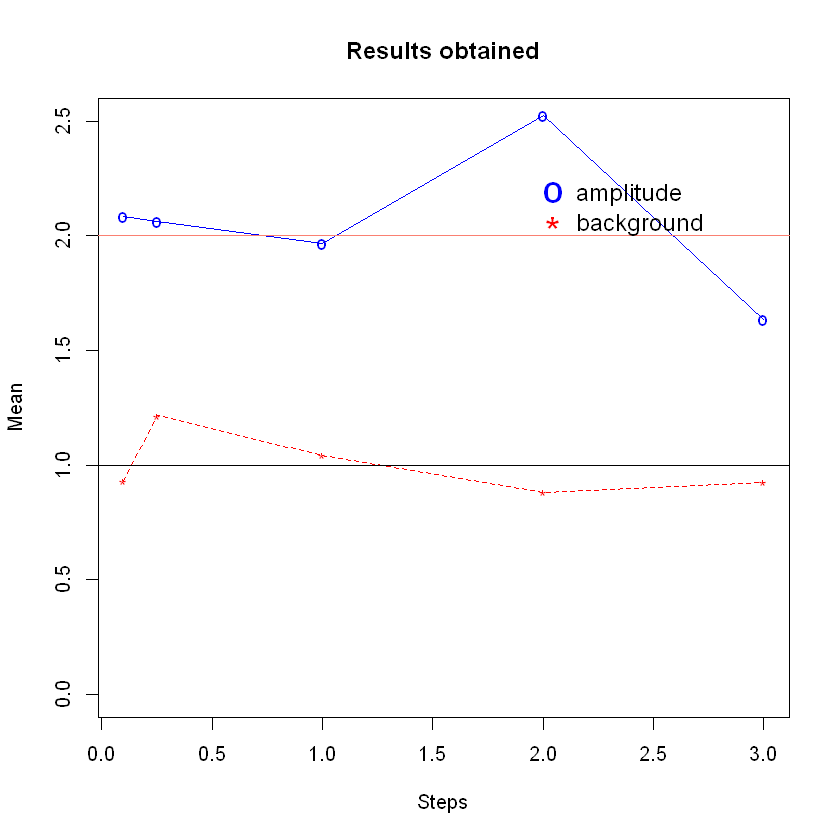

In [36]:
plot(ww, mean.a, type="o", col="blue", pch="o", lty=1, ylab="Mean", xlab = "Steps", ylim = c(0,2.5))
points(ww, mean.b, col="red", pch="*")
lines(ww, mean.b, col="red",lty=2)
title('Results obtained')
abline(h = 1)
abline(h = 2, col = "salmon")

legend("topright", 
  legend = c("amplitude", "background"), 
  col = c("blue","red"), 
  pch = c("o","*"), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))

As it can be seen, the background does not look affected by the sampling whereas, a better sampling leads to a more accurate value of the amplitude a.

(b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
. Check the effect on the results

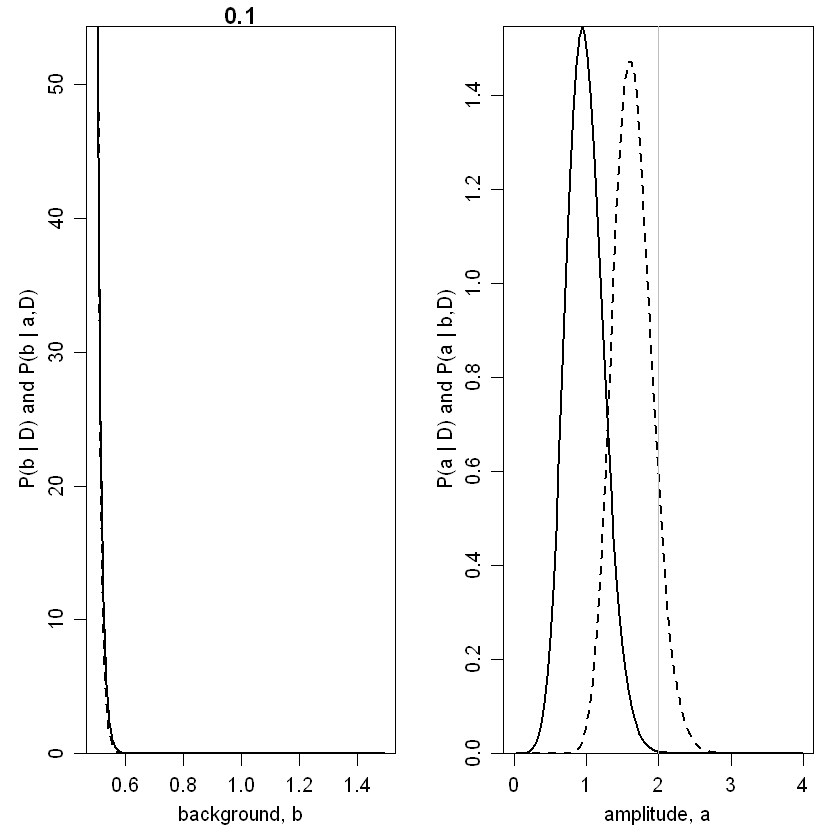

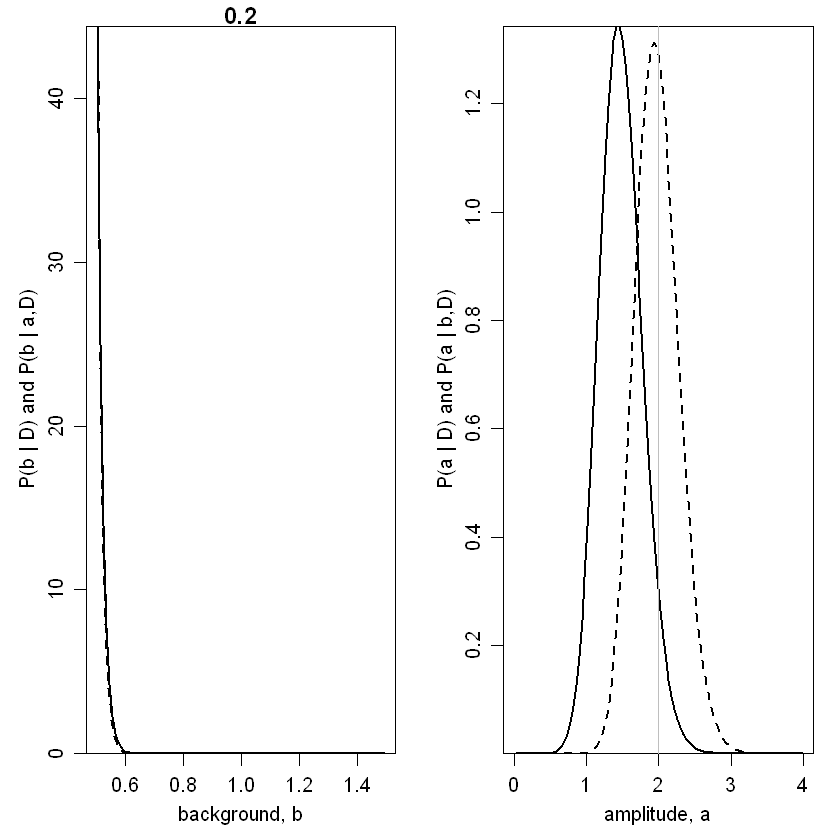

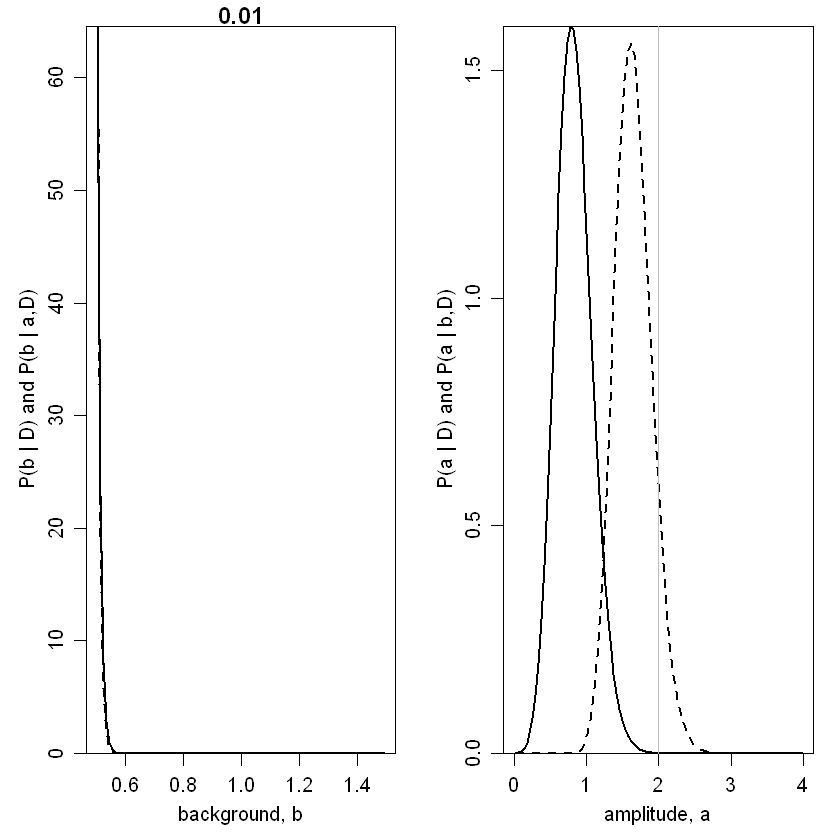

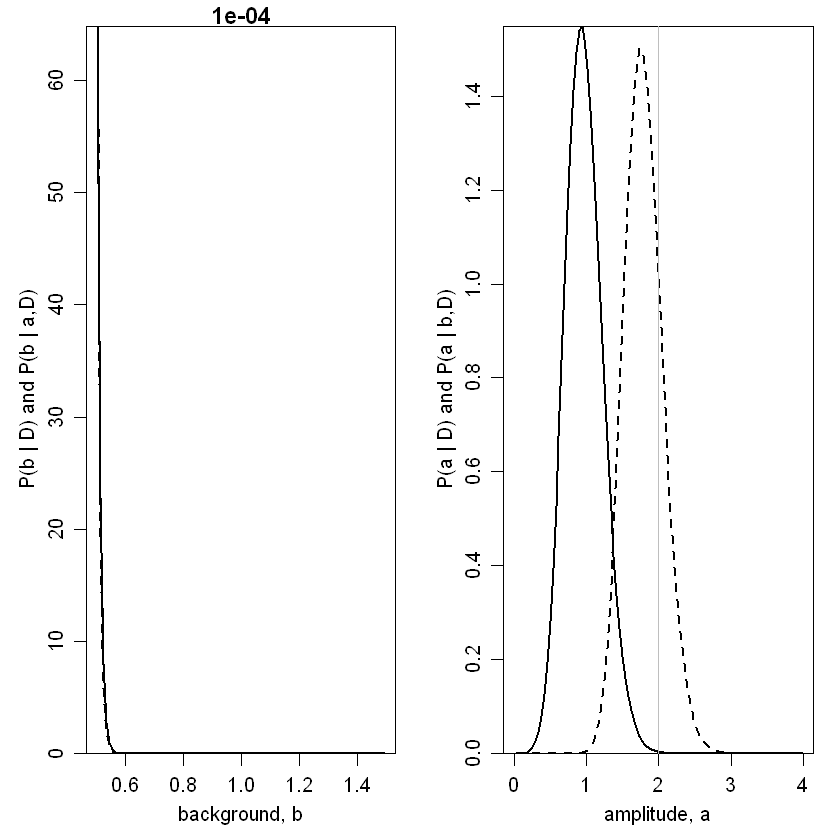

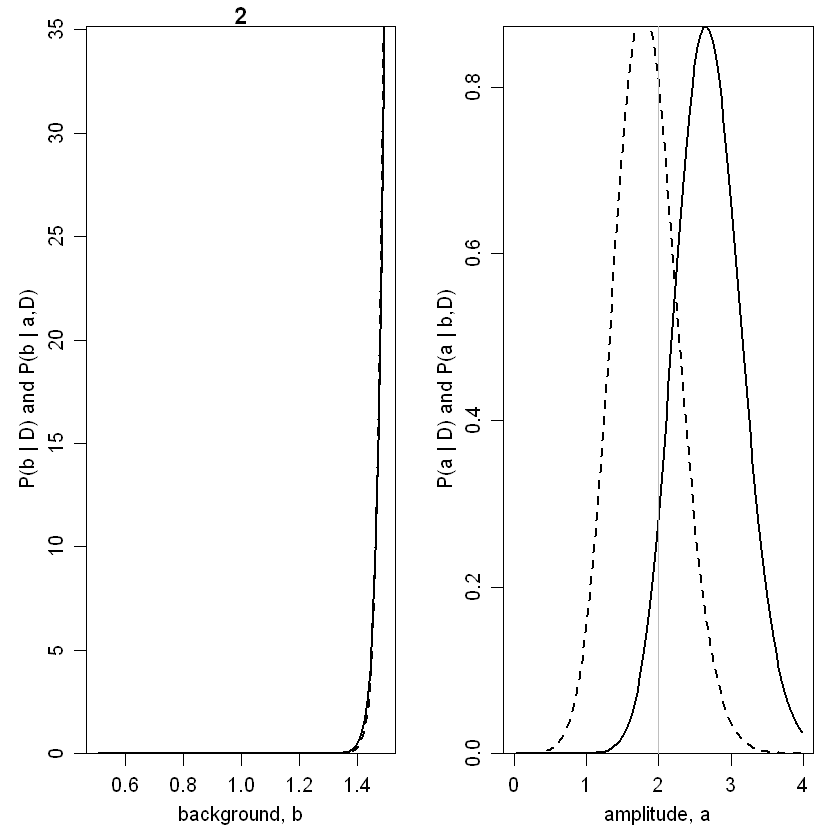

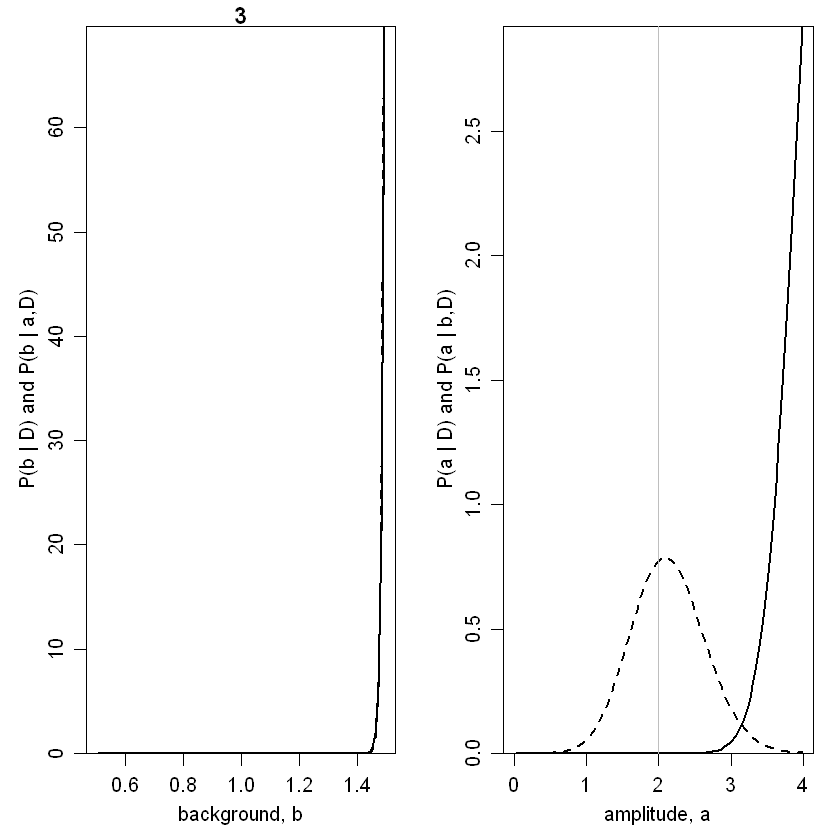

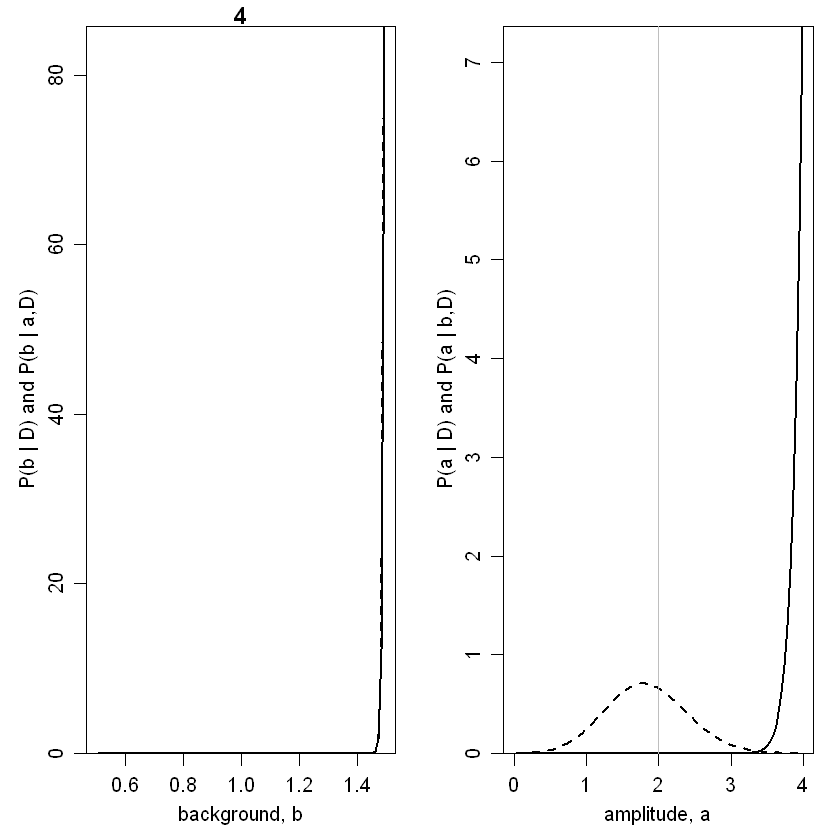

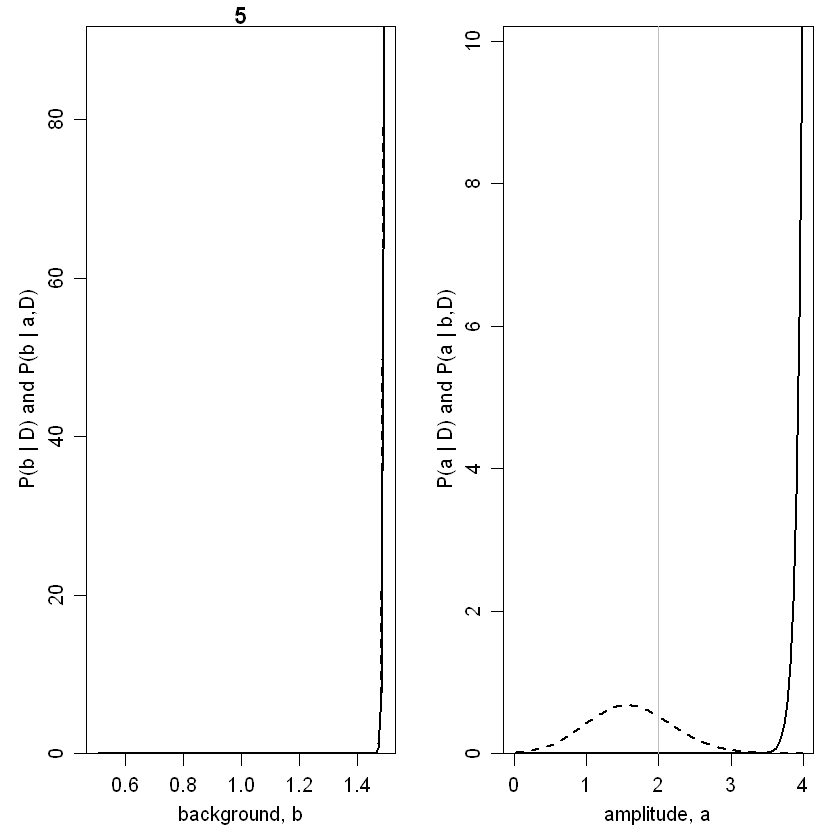

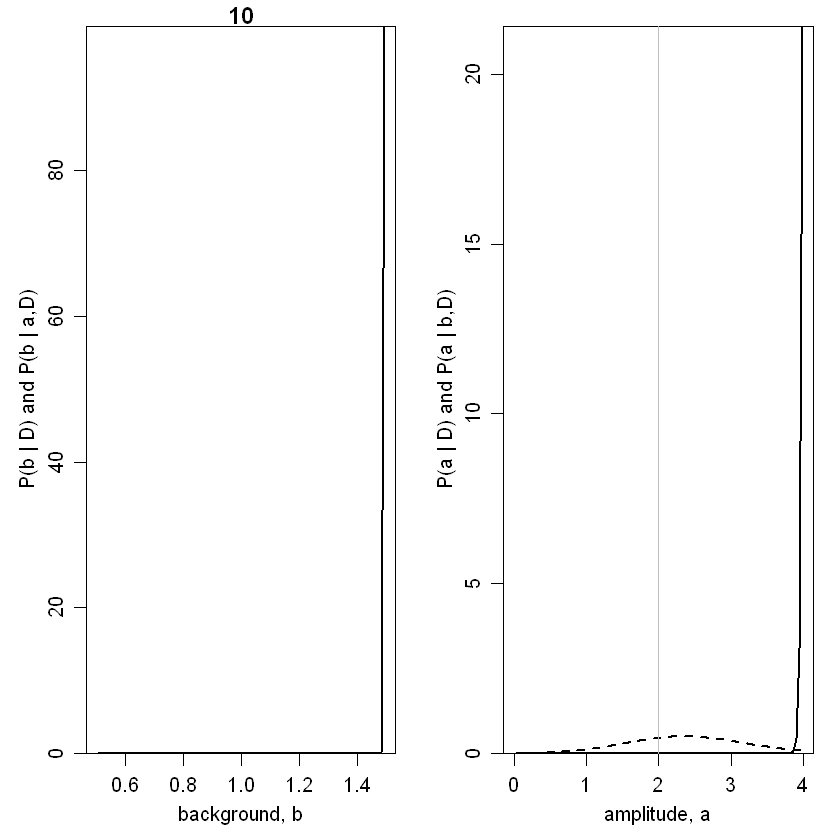

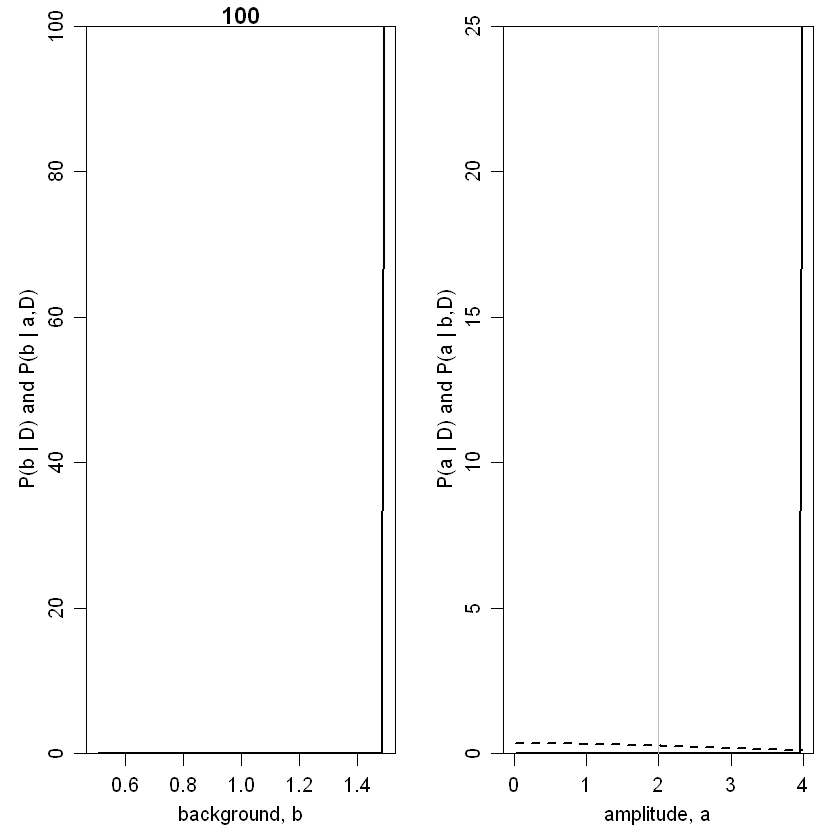

In [37]:
#for example the background is twice that the signal a
#parameters
x0 <- 0 # centre of peak
w <- 1 # sd of peak
atrue <- 2 # amplitude
bb <- c(0.1, 0.2, 0.01, 0.0001,  2,3, 4,  5, 10, 100) # background
t <- 5 # scale factor (exposure time -> sets SNR)

# Sampling grid 
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 1e2
uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid
b <- blim[1] + diff(blim)*uniGrid



mean.a <-c()
mean.b <- c()
sd.a<- c()
sd.b <- c()
ro <- c()
set.seed(205)
p.a.D <- data.frame()
p.b.D<- data.frame()
p.a.bD<- data.frame()
p.b.bD<- data.frame()

par(mfrow=c(1,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
for (btrue in bb){
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    strue <- signal(xdat, atrue, btrue, x0, w, t)
    ddat <- rpois(length(strue), strue)
    
    #log unnormalized posterior
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- logupost(ddat, xdat, a[j], b[k], x0, w, t)
                            }
                            }
    z <- z - max(z) # set maximum to zero
   
    # Compute normalized marginalized posteriors, P(a|D) and P(b|D)
    # by summing over other parameter
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    # Compute mean, standard deviation, covariance, correlation, of a and b
    mean_a <- delta_a * sum(a * p_a_D)
    mean_b <- delta_b * sum(b * p_b_D)
    sd_a <- sqrt( delta_a * sum((a-mean_a)^2 * p_a_D) )
    sd_b <- sqrt( delta_b * sum((b-mean_b)^2 * p_b_D) )
    
    # To calculate the covariance I need to normalize P(a,b|D) = exp(z).
    cov_ab <- 0
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
                cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])
                            }
                    }
    cov_ab <- cov_ab / sum(exp(z))
    rho_ab <- cov_ab / (sd_a * sd_b)
    
    mean.a <- append(mean.a, mean_a)
    sd.a <- append(sd.a, sd_a)
    
    mean.b <- append(mean.b, mean_b)
    sd.b <- append(sd.b, sd_b)
    ro <- append(ro, rho_ab)
    
    # Compute normalized conditional posteriors, P(a|b,D) and P(b|a,D)
    p_a_bD <- exp(Vectorize(logupost, "a")(ddat, xdat, a, btrue, x0, w, t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(logupost, "b")(ddat, xdat, atrue, b, x0, w, t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    p.a.D <- rbind(p.a.D, p_a_D)
    p.b.D <- rbind(p.b.D, p_b_D)
    p.a.bD <- rbind(p.a.bD, p_a_bD)
    p.b.bD <- rbind(p.b.bD, p_b_aD)

    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background, b", yaxs="i", main = btrue, 
     ylab="P(b | D) and P(b | a,D)",
    type="l", lwd=2)
    lines(b, p_b_aD, lwd=2, lty=2)
    abline(v=btrue, col="grey")
    plot(a, p_a_D, xlab="amplitude, a", yaxs="i",
     ylab="P(a | D) and P(a | b,D)",
    type="l", lwd=2)
    lines(a, p_a_bD, lwd=2, lty=2)
    abline(v=atrue, col="grey")
   
 
}

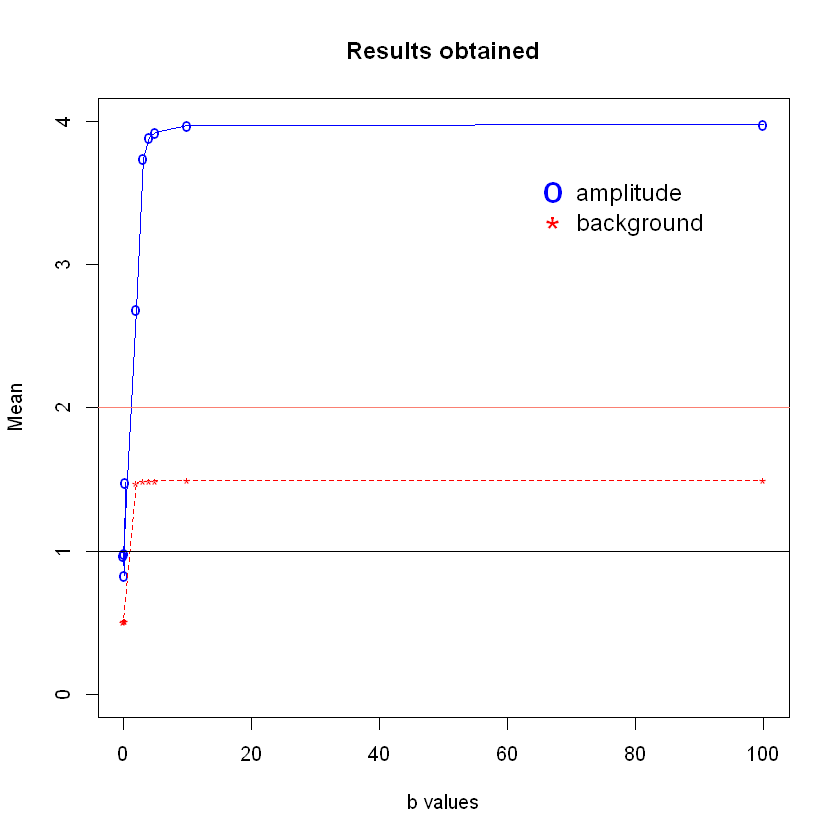

In [38]:
plot(bb, mean.a, type="o", col="blue", pch="o", lty=1, ylab="Mean", xlab = "b values", ylim = c(0, 4))
points(bb, mean.b, col="red", pch="*")
lines(bb, mean.b, col="red",lty=2)
title('Results obtained')
abline(h = 1)
abline(h = 2, col = "salmon")

legend("topright", 
  legend = c("amplitude", "background"), 
  col = c("blue","red"), 
  pch = c("o","*"), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))

If the amplitude is greater than the background then the bacground signal is "like a line". The amplitude become more peaked as long as it increase.

When the ratio is small, meaning the background is greater, the background becomes stepped and the real amplitude becomes harder to look (it becomes flater and flater) and the value of the amplitude converges to some value.